In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

$\ddot{\phi} = \frac{-b\dot{\phi}+3M2}{ml^2\sin^2(\theta)}$

$\ddot{\theta} = \frac{-2mgl}{4I_1+ml^2}\sin(\theta)+ \frac{ml^2}{4I_1+ml^2}\dot{\phi}^2\sin(\theta)\cos(\theta) + \frac{4M_1}{4I_1+ml^2}$

In [51]:
l = 1
r = 0.1
m = 1
I1 = m*(3*r**2+l**2)/12
g = 9.81

In [52]:
theta0 = np.pi/10
phi0 = np.pi/6

omega = 0
psi = 0

angles  = np.array([theta0, phi0])
theta = theta0
phi = phi0

M1 = 2*m*g*l*np.sin(theta0)/4.0
M2 = 0*7.2
dt = 0.0001
t = np.arange(0, 3, dt)

for i in range(1,len(t)):
    dtheta = omega
    domega = (-2*m*g*l*np.sin(theta) + m*l**2*psi**2*np.sin(theta)*np.cos(theta)+4*(M1+np.sin(3*2*np.pi*t[i])))/(4*I1+m*l**2)
    dphi = psi
    dpsi = 3*M2/(m*l**2*np.sin(theta)**2) - 3.5*psi/(m*l**2*np.sin(theta)**2)
    #print(str(-2*m*g*l*np.sin(theta)) + ', ' +  str(m*l**2*psi**2*np.sin(theta)*np.cos(theta) ))
    
    theta = theta + dt*dtheta
    psi = psi + dt*dpsi
    phi = phi + dt*dphi
    omega = omega + dt*domega
    
    angles = np.vstack((angles, [theta, phi]))
    
    

<IPython.core.display.Javascript object>


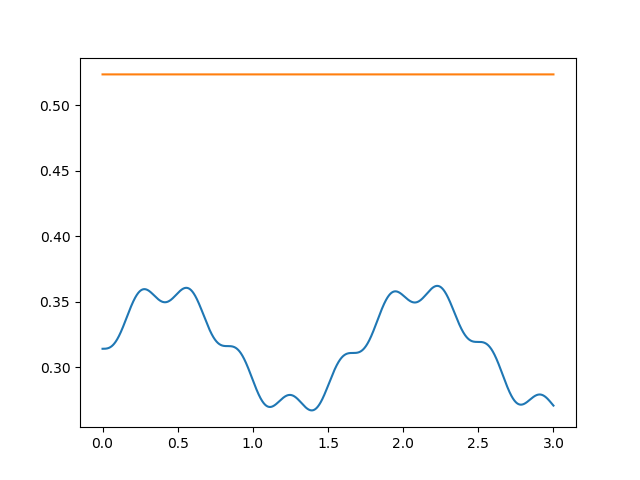

In [53]:
plt.figure()
plt.plot(t,angles)
plt.show()

In [30]:
angles

array([[0.31415927, 0.78539816],
       [0.31415927, 0.78539816],
       [0.31415927, 0.78539816],
       ...,
       [0.27081416, 0.78539816],
       [0.27080064, 0.78539816],
       [0.27078712, 0.78539816]])

In [54]:
rcm = l/2*np.hstack(((np.sin(angles[:,0])*np.cos(angles[:,1])).reshape(angles.shape[0],1),
                    (np.sin(angles[:,0])*np.sin(angles[:,1])).reshape(angles.shape[0],1),
                    (-np.cos(angles[:,0])).reshape(angles.shape[0],1)))

In [55]:
rcm

array([[ 0.13380828,  0.07725425, -0.47552826],
       [ 0.13380828,  0.07725425, -0.47552826],
       [ 0.13380828,  0.07725425, -0.47552826],
       ...,
       [ 0.11583783,  0.066879  , -0.48177671],
       [ 0.11583219,  0.06687575, -0.48177852],
       [ 0.11582655,  0.06687249, -0.48178032]])

In [56]:
m1 = np.zeros_like(rcm) 
m2 = rcm
m3 = rcm + r*np.hstack(((np.cos(angles[:,0])*np.cos(angles[:,1])).reshape(angles.shape[0],1),
                        (np.cos(angles[:,0])*np.sin(angles[:,1])).reshape(angles.shape[0],1),
                         np.sin(angles[:,0]).reshape(angles.shape[0],1))) 
#m3 = rcm + r*np.hstack(((np.cos(angles[:,0])*np.cos(0)).reshape(angles.shape[0],1),
#                        (np.cos(angles[:,0])*np.sin(0)).reshape(angles.shape[0],1),
#                        (np.sin(angles[:,0])*np.cos(angles[:,1])).reshape(angles.shape[0],1)))
t = t[0::100]
m1=m1[0::100,:]
m2=m2[0::100,:]
m3=m3[0::100,:]

In [57]:
m2

array([[ 0.13380828,  0.07725425, -0.47552826],
       [ 0.13381213,  0.07725647, -0.47552682],
       [ 0.13383888,  0.07727191, -0.47551678],
       [ 0.13391058,  0.07731331, -0.47548986],
       [ 0.13404763,  0.07739244, -0.47543837],
       [ 0.134268  ,  0.07751967, -0.47535545],
       [ 0.13458654,  0.07770357, -0.47523533],
       [ 0.13501444,  0.07795062, -0.47507347],
       [ 0.13555877,  0.07826489, -0.47486675],
       [ 0.13622223,  0.07864794, -0.47461353],
       [ 0.13700298,  0.07909871, -0.4743138 ],
       [ 0.13789471,  0.07961355, -0.47396912],
       [ 0.13888685,  0.08018636, -0.47358272],
       [ 0.1399649 ,  0.08080877, -0.47315935],
       [ 0.14111096,  0.08147045, -0.47270526],
       [ 0.14230435,  0.08215946, -0.47222801],
       [ 0.14352232,  0.08286265, -0.47173629],
       [ 0.14474084,  0.08356616, -0.47123963],
       [ 0.14593546,  0.08425588, -0.47074812],
       [ 0.14708212,  0.0849179 , -0.47027205],
       [ 0.14815799,  0.08553905, -0.469

In [58]:
rcm.shape

In [59]:
l = 1
r = 0.1
m = 1
I1 = m*r**2/2
I2 = m*(3*r**2+l**2)/12
I3 = m*(3*r**2+l**2)/12

I = np.array([[I1,0,0],[0,I2,0], [0,0,I3]])

dt = t[1]-t[0]

rcm = m2
vcm = np.diff(rcm, axis = 0)/dt
acm = np.diff(vcm, axis = 0)/dt
    

F = np.zeros_like(m1)
Mo = np.zeros_like(F)
MoBar = np.zeros_like(F)
e1 = np.zeros_like(F)
e2 = np.zeros_like(F)
e3 = np.zeros_like(F)
thetaGlobal = np.zeros_like(F)
thetaLocal = np.zeros_like(F)


for i in range(acm.shape[0]):
    e1[i,:] = m2[i,:] - m1[i,:]
    e1[i,:] = e1[i,:]/np.linalg.norm(e1[i,:])
    
    e2[i,:] = m3[i,:] - m2[i,:]
    e2[i,:] = e2[i,:]/np.linalg.norm(e2[i,:])
    
    e3[i,:] = np.cross(e1[i,:],e2[i,:])
    
de1dt = np.diff(e1[0:-1,:], axis=0)/(2*dt) + np.diff(e1[1:,:], axis=0)/(2*dt)
de2dt = np.diff(e2[0:-1,:], axis=0)/(2*dt) + np.diff(e2[1:,:], axis=0)/(2*dt)
de3dt = np.diff(e3[0:-1,:], axis=0)/(2*dt) + np.diff(e3[1:,:], axis=0)/(2*dt)

omega = np.hstack((np.sum(de2dt*e3[0:de2dt.shape[0],:], axis=1).reshape(de2dt.shape[0],1),
                   np.sum(de3dt*e1[0:de1dt.shape[0],:], axis=1).reshape(de2dt.shape[0],1),
                   np.sum(de1dt*e2[0:de2dt.shape[0],:], axis=1).reshape(de2dt.shape[0],1)))

alpha = np.diff(omega[0:-1,:], axis=0)/(2*dt) + np.diff(omega[1:,:], axis=0)/(2*dt)
acm

array([[ 2.29017360e-01,  1.32223235e-01,  8.59379138e-02],
       [ 4.49577681e-01,  2.59563795e-01,  1.68808205e-01],
       [ 6.53491101e-01,  3.77293263e-01,  2.45758225e-01],
       [ 8.33130950e-01,  4.81008378e-01,  3.14241033e-01],
       [ 9.81718855e-01,  5.66795645e-01,  3.72054106e-01],
       [ 1.09358225e+00,  6.31380007e-01,  4.17355657e-01],
       [ 1.16437292e+00,  6.72251018e-01,  4.48667802e-01],
       [ 1.19123644e+00,  6.87760681e-01,  4.64876009e-01],
       [ 1.17292446e+00,  6.77188255e-01,  4.65233144e-01],
       [ 1.10984421e+00,  6.40768854e-01,  4.49373874e-01],
       [ 1.00404261e+00,  5.79684272e-01,  4.17341473e-01],
       [ 8.59125490e-01,  4.96016333e-01,  3.69624909e-01],
       [ 6.80115405e-01,  3.92664812e-01,  3.07200128e-01],
       [ 4.73254767e-01,  2.73233767e-01,  2.31566350e-01],
       [ 2.45763424e-01,  1.41891579e-01,  1.44766533e-01],
       [ 5.56208402e-03,  3.21127070e-03,  4.93812055e-02],
       [-2.39025759e-01, -1.38001587e-01

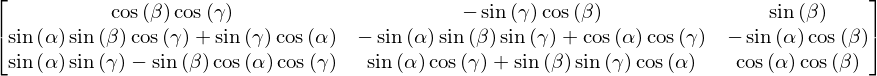

In [60]:
import sympy as sym
sym.init_printing()

alpha1, beta1, gamma1 = sym.symbols('alpha, beta, gamma')

Ra = sym.Matrix([[1,0,0],[0,sym.cos(alpha1), -sym.sin(alpha1)],[0,sym.sin(alpha1), sym.cos(alpha1)]])
Rb = sym.Matrix([[sym.cos(beta1),0, sym.sin(beta1)],[0,1,0],[-sym.sin(beta1),0 ,sym.cos(beta1)]])
Rg = sym.Matrix([[sym.cos(gamma1), -sym.sin(gamma1),0],[sym.sin(gamma1), sym.cos(gamma1),0],[0,0,1]])

Ra*Rb*Rg

In [61]:
for i in range(alpha.shape[0]):
     R = np.vstack((e1[i,:].reshape(1,3),
                    e2[i,:].reshape(1,3),
                    e3[i,:].reshape(1,3))) 

     alphaGlobal = np.arctan2(-R.T[1,2],R.T[1,1])   
     betaGlobal = np.arctan2(-R.T[2,0],R.T[0,0])   
     gammaGlobal = np.arctan2(R.T[1,0], np.sqrt(R.T[1,1]**2+R.T[1,2]**2))

     thetaGlobal[i,:] = np.array([alphaGlobal, betaGlobal, gammaGlobal]) 
     thetaLocal[i,:] = R.dot(thetaGlobal[i,:])

     F[i,:] = m*np.array([0,0,9.81]) + m*acm[i,:]

     r0cm = -rcm[i,:]
     MF = -np.cross(r0cm, F[i,:])

     MFBar = R.dot(MF.reshape(3,1)).reshape(1,3)

     MoBar[i,:] = np.array([I1*alpha[i,0] + omega[i,1]*omega[i,2]*(I3-I2) + MFBar[0,0],
                            I2*alpha[i,1] + omega[i,0]*omega[i,2]*(I1-I3) + MFBar[0,1],
                            I3*alpha[i,2] + omega[i,0]*omega[i,1]*(I2-I1) + MFBar[0,2]])

     Mo[i,:] = (R.T).dot(MoBar[i,:].T)   

         
         
         

<IPython.core.display.Javascript object>


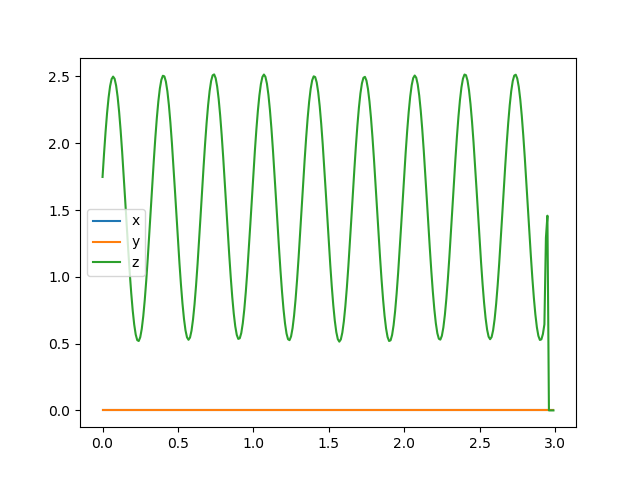

In [62]:
plt.figure()
plt.plot(t,MoBar)
#plt.ylim((-10,10))
plt.legend(('x','y','z'))
plt.show()

<IPython.core.display.Javascript object>


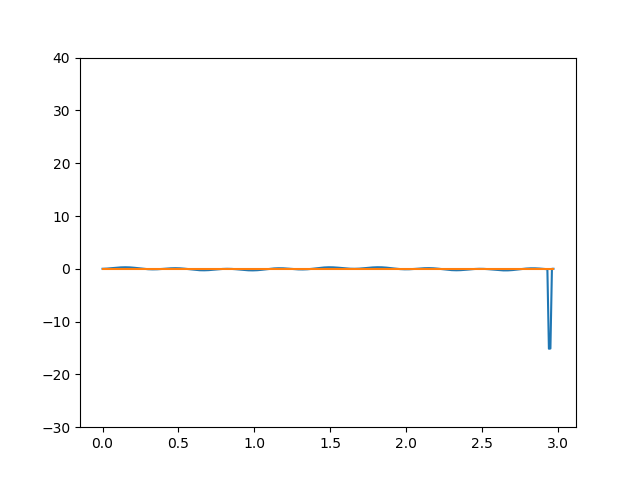

In [63]:
plt.figure()
plt.plot(t[0:-2], (np.diff(thetaLocal[0:-1,0])/dt+np.diff(thetaLocal[1:,0])/dt)/2)
plt.plot(t[0:-2], omega[:,0])
plt.ylim((-30,40))
plt.show()

In [39]:
thetaGlobal

array([[0.81047853, 1.34496262, 0.22028527],
       [0.81048005, 1.34495568, 0.22029171],
       [0.81049059, 1.34490746, 0.22033647],
       [0.81051886, 1.34477815, 0.22045646],
       [0.81057294, 1.34453096, 0.22068583],
       [0.81066004, 1.3441334 , 0.22105464],
       [0.81078624, 1.34355849, 0.22158782],
       [0.81095634, 1.34278575, 0.22230414],
       [0.81117367, 1.341802  , 0.22321556],
       [0.81144   , 1.34060183, 0.22432668],
       [0.81175544, 1.33918789, 0.2256346 ],
       [0.81211839, 1.3375708 , 0.22712893],
       [0.8125256 , 1.33576895, 0.22879211],
       [0.81297212, 1.3338078 , 0.23060005],
       [0.81345145, 1.33171917, 0.23252288],
       [0.8139557 , 1.32954012, 0.23452605],
       [0.81447575, 1.32731176, 0.23657146],
       [0.81500154, 1.32507784, 0.23861881],
       [0.81552239, 1.32288328, 0.24062699],
       [0.81602736, 1.32077262, 0.24255549],
       [0.81650566, 1.31878847, 0.24436577],
       [0.81694708, 1.31697005, 0.2460226 ],
       [0.

<IPython.core.display.Javascript object>


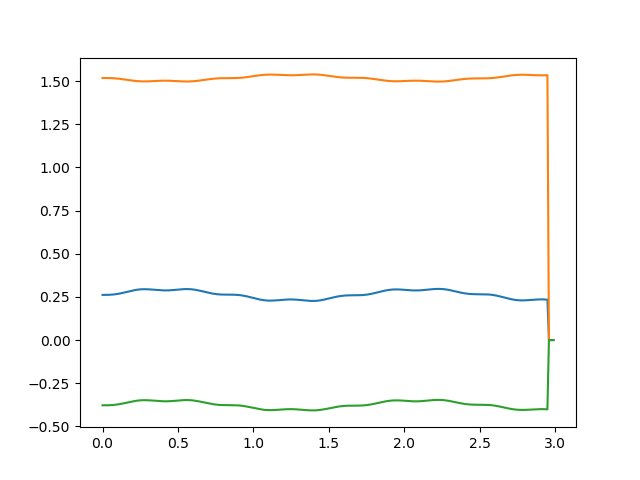

In [40]:
plt.figure()
plt.plot(t, thetaLocal)
plt.show()

In [64]:
R

array([[ 2.36939863e-01,  1.36797293e-01, -9.61845103e-01],
       [ 8.32982294e-01,  4.80922551e-01,  2.73594587e-01],
       [ 5.00000000e-01, -8.66025404e-01,  1.38777878e-17]])

In [65]:
np.savetxt('3dPendulum.txt', np.hstack((t.reshape(-1,1),m1,m2,m3)),delimiter=',')

In [66]:
t.shape

In [67]:
m1.shape


In [68]:
m1

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [69]:
m2

array([[ 0.13380828,  0.07725425, -0.47552826],
       [ 0.13381213,  0.07725647, -0.47552682],
       [ 0.13383888,  0.07727191, -0.47551678],
       [ 0.13391058,  0.07731331, -0.47548986],
       [ 0.13404763,  0.07739244, -0.47543837],
       [ 0.134268  ,  0.07751967, -0.47535545],
       [ 0.13458654,  0.07770357, -0.47523533],
       [ 0.13501444,  0.07795062, -0.47507347],
       [ 0.13555877,  0.07826489, -0.47486675],
       [ 0.13622223,  0.07864794, -0.47461353],
       [ 0.13700298,  0.07909871, -0.4743138 ],
       [ 0.13789471,  0.07961355, -0.47396912],
       [ 0.13888685,  0.08018636, -0.47358272],
       [ 0.1399649 ,  0.08080877, -0.47315935],
       [ 0.14111096,  0.08147045, -0.47270526],
       [ 0.14230435,  0.08215946, -0.47222801],
       [ 0.14352232,  0.08286265, -0.47173629],
       [ 0.14474084,  0.08356616, -0.47123963],
       [ 0.14593546,  0.08425588, -0.47074812],
       [ 0.14708212,  0.0849179 , -0.47027205],
       [ 0.14815799,  0.08553905, -0.469

<IPython.core.display.Javascript object>


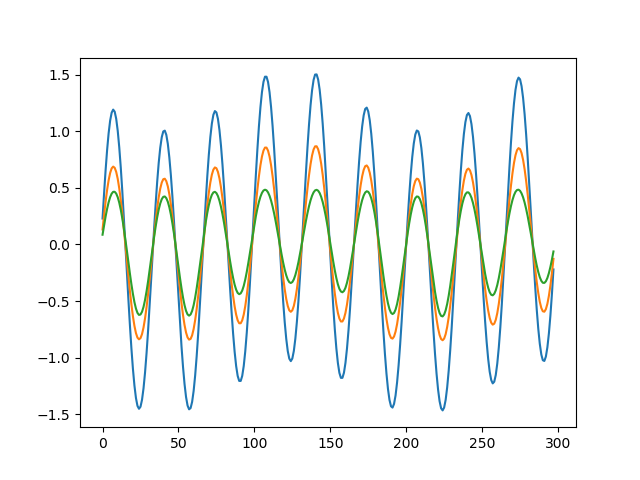

In [70]:
plt.figure()
plt.plot(acm)
plt.show()